# Интернет-магазин видеоигр


В этом проекте наша основная цель - помочь интернет-магазину, продающему компьютерные игры, определить наиболее перспективные игры и платформы, на которые стоит делать ставку при планировании рекламных кампаний на очередной год. 


Для этого нужно определить, как жанр игры, платформа, на которой выхоит игра, оценки пользователей и экспертов связаны с коммерческим успехом игры на разных рынках

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

**ОГЛАВЛЕНИЕ**
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)
2. [Шаг 2. Подготовьте данные](#step2)
    1. [Замените названия столбцов (приведите к нижнему регистру)](#step2A)
    2. [Преобразуйте данные в нужные типы](#step2B)
    3. [Обработайте пропуски при необходимости](#step2C)
    4. [Посчитайте суммарные продажи во всех регионах](#step2D)
3. [Шаг 3. Проанализируйте данные](#step3)
    1. [сколько игр выпускалось в разные годы](#step3A)
    2. [как менялись продажи по платформам](#step3B)
    3. [Возьмите данные за соответствующий актуальный период](#step3C)
    4. [Какие платформы лидируют по продажам, растут или падают?](#step3D)
    5. [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам](#step3E)
    6. [как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами](#step3F)
    7. [Соотнесите выводы с продажами игр на других платформах](#step3G)
    8. [Посмотрите на общее распределение игр по жанрам](#step3H)
4. [Шаг 4. Составьте портрет пользователя каждого региона](#step4)
    1. [Самые популярные платформы (топ-5)](#step4A)
    2. [Самые популярные жанры (топ-5)](#step4B)
    3. [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#step4C)
5. [Шаг 5. Проверьте гипотезы](#step5)
    1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step5A)
    2. [Средние пользовательские рейтинги жанров Action и Sports разные](#step5B)
6. [Шаг 6. Напишите общий вывод](#step6)

In [1]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt
import matplotlib

<a id="step1"></a>
### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод
Нам представлены данные за 1980-2016 гг о продажах видеоигр (в млн проданных копий)


Отсутсвуют пропуски в таких важных столбцах, как Platform и sales (по регионам). Наибольшее количество пропусков - в столбцах Critic_Score, User_Score и Rating


требуется заменить тип данных в столбцах Year_of_Release и User_Score   


требуется привести значение в таблице к нижнему регистру

<a id="step2"></a>
### Шаг 2. Подготовьте данные

<a id="step2A"></a>
#### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
df = df.rename(str.lower, axis='columns')

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="step2B"></a>
#### Преобразуйте данные в нужные типы

приведем год выпуска к формату даты (сохраним только год)

In [7]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

приведем оценки пользователей к типу float

In [8]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.5       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

присутсвие строкового значения 'tbd' (To Be Determined) мешает преобразованию типа в данном столбце. У нас нет надежного критерия, чтобы заранее определить, каким будет рейтинг пользователей. Поэтому меняем данные значения на NaN

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [10]:
df['user_score'] = df['user_score'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


приведем к нижнему регистру значения в столбцах name, platform, genre                                   

In [12]:
df['name'] = df['name'].str.lower()

In [13]:
df['platform'] = df['platform'].str.lower()

In [14]:
df['genre'] = df['genre'].str.lower()

In [15]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id="step2C"></a>
#### Обработайте пропуски при необходимости

В данном проекте обработка проупсков вызывает затруднения. Наибольшее число пропусков содержат стоблцы critic_score, user_score и rating. В первых содержатся оценки, аднные игре критиками и пользователями, а в последнем - рейтинг, присваиваемый Entertainment Software Rating Board (ESRB). У нас нет надежного критерия, чтобы определить пропущенные значения оценки критиков и пользователей. Замена пропусков на средние или медианные, например, по жанру не кажется подходящей. Что касается рейтинга ESRB, то для многих игр его просто не может быть, так как ESRB была создана только в 1994 году.


Исходя из сказанного, в данном исследовании мы предпочли отказаться от попыток заполнить пропуски в данных

<a id="step2D"></a>
#### Посчитайте суммарные продажи во всех регионах

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод
Мы провели предварительную обработку данных:

- привели к формату времени дату выхода игры
- привели к строчным названия столбцов, а также значения в столбцах name, platform, genre
- привели к формату float значения в столбце user_score, предварительно обработав (заменив на NaN) значения  'tbd' (To Be Determined) 


Мы вынуждены были отказаться от заполнения пропусков в таких столбцах как critic_score, user_score и rating


Мы расчитали в отдельном столбце глобальные продажи для каждой игры

<a id="step3"></a>
### Шаг 3. Проанализируйте данные

<a id="step3A"></a>
#### сколько игр выпускалось в разные годы

In [93]:
games_cnt = df.pivot_table(index='year_of_release', values='name', aggfunc= ['count'])

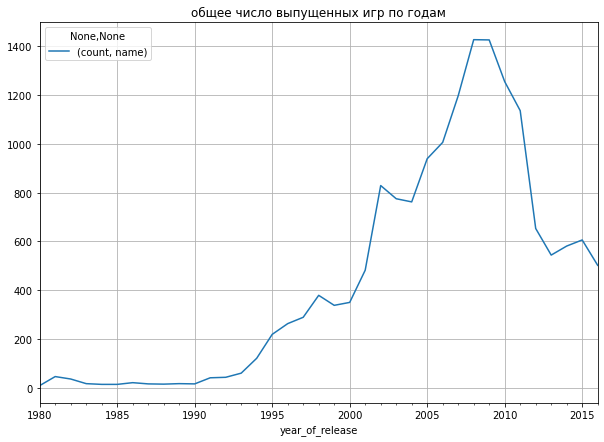

In [99]:
games_cnt.plot(figsize=(10,7), grid=True, title = "общее число выпущенных игр по годам");

количество игр нарастало до 2008 года, затем стабилизировалось (2008-2009) и пошло на спад

<a id="step3B"></a>
#### как менялись продажи по платформам

In [19]:
df.pivot_table(index='platform', values='total_sales', aggfunc= ['sum']).sort_values(('sum','total_sales'), ascending = False)

,sum
,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14


к платформам с наибольшими продажами можно отнести первые 6, тк между ps и gba уже наблюдается двукратная разница в продажах

In [20]:
platforms_top = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [21]:
df_top = df.query('platform == @platforms_top')

In [22]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9422 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             9422 non-null   object        
 1   platform         9422 non-null   object        
 2   year_of_release  9262 non-null   datetime64[ns]
 3   genre            9422 non-null   object        
 4   na_sales         9422 non-null   float64       
 5   eu_sales         9422 non-null   float64       
 6   jp_sales         9422 non-null   float64       
 7   other_sales      9422 non-null   float64       
 8   critic_score     4536 non-null   float64       
 9   user_score       4322 non-null   float64       
 10  rating           5968 non-null   object        
 11  total_sales      9422 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 956.9+ KB


как мы видим, больше половины игр вышло на 6 наиболее попоулярных платформах

In [23]:
df_top['year_of_release'].min()

Timestamp('1985-01-01 00:00:00')

In [24]:
df_top['year_of_release'].max()

Timestamp('2016-01-01 00:00:00')

In [25]:
top_sales_year = df_top.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc= ['sum'])

In [26]:
top_sales_year

sum                                        
platform             ds      ps     ps2     ps3     wii    x360
year_of_release                                                
1985-01-01         0.02     NaN     NaN     NaN     NaN     NaN
1994-01-01          NaN    6.03     NaN     NaN     NaN     NaN
1995-01-01          NaN   35.96     NaN     NaN     NaN     NaN
1996-01-01          NaN   94.70     NaN     NaN     NaN     NaN
1997-01-01          NaN  136.17     NaN     NaN     NaN     NaN
1998-01-01          NaN  169.49     NaN     NaN     NaN     NaN
1999-01-01          NaN  144.53     NaN     NaN     NaN     NaN
2000-01-01          NaN   96.37   39.17     NaN     NaN     NaN
2001-01-01          NaN   35.59  166.43     NaN     NaN     NaN
2002-01-01          NaN    6.67  205.38     NaN     NaN     NaN
2003-01-01          NaN    2.07  184.31     NaN     NaN     NaN
2004-01-01        17.27     NaN  211.81     NaN     NaN     NaN
2005-01-01       130.14     NaN  160.66     NaN     NaN    8.25
2006-01-01       119.81     NaN  103.42   20.96  137.15   51.62
2007-01-01       146.94     NaN   75.99   73.19  152.77   95.41
2008-01-01       145.31     NaN   53.90  118.52  171.32  135.26
2009-01-01       119.54     NaN   26.40  130.93  206.97  120.29
2010-01-01        85.02     NaN    5.64  142.17  127.95  170.03
2011-01-01        26.18     NaN    0.45  156.78   59.65  143.84
2012-01-01        11.01     NaN     NaN  107.36   21.71   99.74
2013-01-01         1.54     NaN     NaN  113.25    8.59   88.58
2014-01-01          NaN     NaN     NaN   47.76    3.75   34.74
2015-01-01          NaN     NaN     NaN   16.82    1.14   11.96
2016-01-01          NaN     NaN     NaN    3.60    0.18    1.52

<AxesSubplot:xlabel='year_of_release'>

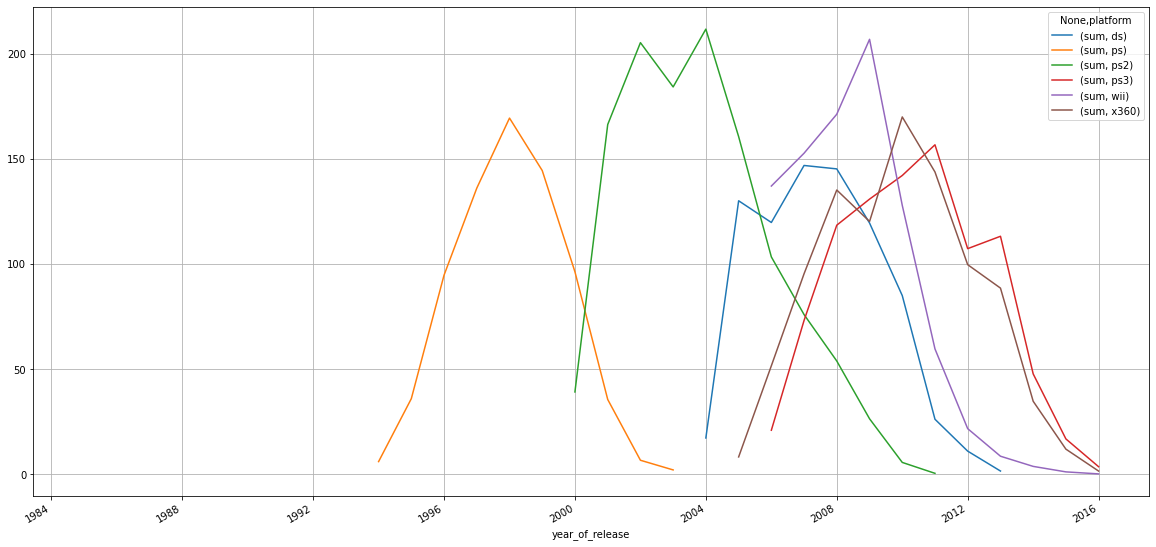

In [27]:
top_sales_year.plot(figsize=(20,10), grid=True)

очень четко видно, что "жизненный цикл" платформы составляет примерно 10 лет. Жзненный цикл, условно говоря, состит из фазы бурного роста (первые 2-3 года), фазы зрелости (продажи достигают пика и начинают снижаться) и фазы упадка (примерно 7 лет), когда продажи падают более, чем наполовину от пиковых значений. 

<a id="step3C"></a>
#### Возьмите данные за соответствующий актуальный период

Исходя из сделанных выше выводов, примем 2010-2016 гг в качестве актуального периода для прогноза на 2017 год, то есть не будем учитыать продажи по тем платформам, которые либо уже ушли в прошлое, либо находятся в понижательной части своего жизненного цикла. Для 2016 года нужно иметь в виду, что данные по нему могут быть неполными (по условию задания)

<a id="step3D"></a>
#### Какие платформы лидируют по продажам, растут или падают?

Возвращаемся к полному датафрейму и делаем срез по 2010-2016 гг. Это позволит оставить только актуальные данные

In [28]:
df_actual = df.query('year_of_release >= 2010')

In [29]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             5277 non-null   object        
 1   platform         5277 non-null   object        
 2   year_of_release  5277 non-null   datetime64[ns]
 3   genre            5277 non-null   object        
 4   na_sales         5277 non-null   float64       
 5   eu_sales         5277 non-null   float64       
 6   jp_sales         5277 non-null   float64       
 7   other_sales      5277 non-null   float64       
 8   critic_score     2312 non-null   float64       
 9   user_score       2499 non-null   float64       
 10  rating           3113 non-null   object        
 11  total_sales      5277 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 535.9+ KB


In [30]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010-01-01,misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,grand theft auto v,ps3,2013-01-01,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013-01-01,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,pokemon black/pokemon white,ds,2010-01-01,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,call of duty: modern warfare 3,x360,2011-01-01,shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


In [31]:
df_actual.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,5277.000000,5277.000000,5277.000000,5277.000000,2312.000000,2499.000000,5277.000000
mean,0.214215,0.159411,0.057825,0.050688,70.454152,6.678311,0.482138
std,0.613094,0.464190,0.227112,0.150637,13.561583,1.521214,1.235982
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,62.000000,5.900000,0.040000
50%,0.050000,0.020000,0.000000,0.010000,73.000000,7.000000,0.130000
75%,0.170000,0.130000,0.040000,0.040000,80.000000,7.800000,0.400000
max,15.000000,9.090000,5.650000,3.960000,97.000000,9.300000,21.820000


In [32]:
df_actual['platform'].unique()

array(['x360', 'ps3', 'ds', 'ps4', '3ds', 'wii', 'xone', 'wiiu', 'pc',
       'psp', 'psv', 'ps2'], dtype=object)

In [33]:
df_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc= ['sum'])

sum                                                    \
platform           3ds     ds     pc   ps2     ps3     ps4    psp    psv   
year_of_release                                                            
2010-01-01         NaN  85.02  24.28  5.64  142.17     NaN  35.04    NaN   
2011-01-01       63.20  26.18  35.03  0.45  156.78     NaN  17.82   4.63   
2012-01-01       51.36  11.01  23.22   NaN  107.36     NaN   7.69  16.19   
2013-01-01       56.57   1.54  12.38   NaN  113.25   25.99   3.14  10.59   
2014-01-01       43.76    NaN  13.28   NaN   47.76  100.00   0.24  11.90   
2015-01-01       27.78    NaN   8.52   NaN   16.82  118.90   0.12   6.25   
2016-01-01       15.14    NaN   5.25   NaN    3.60   69.25    NaN   4.25   

                                               
platform            wii   wiiu    x360   xone  
year_of_release                                
2010-01-01       127.95    NaN  170.03    NaN  
2011-01-01        59.65    NaN  143.84    NaN  
2012-01-01        21.71  17.56   99.74    NaN  
2013-01-01         8.59  21.65   88.58  18.96  
2014-01-01         3.75  22.03   34.74  54.07  
2015-01-01         1.14  16.35   11.96  60.14  
2016-01-01         0.18   4.60    1.52  26.15

За выбранный актуальный период рост демонстрируют 2 игровые платформы - ps4 и xone. Учитываем, что данные за 2016 год могут быть неполными

<a id="step3E"></a>
#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [34]:
platforms_actual = ['x360', 'ps3', 'ds', 'ps4', '3ds', 'wii', 'xone', 'wiiu', 'pc',
       'psp', 'psv', 'ps2']

Text(0.5, 1.0, 'диаграмма размаха глобальных продаж игр в разбивке по платформам')

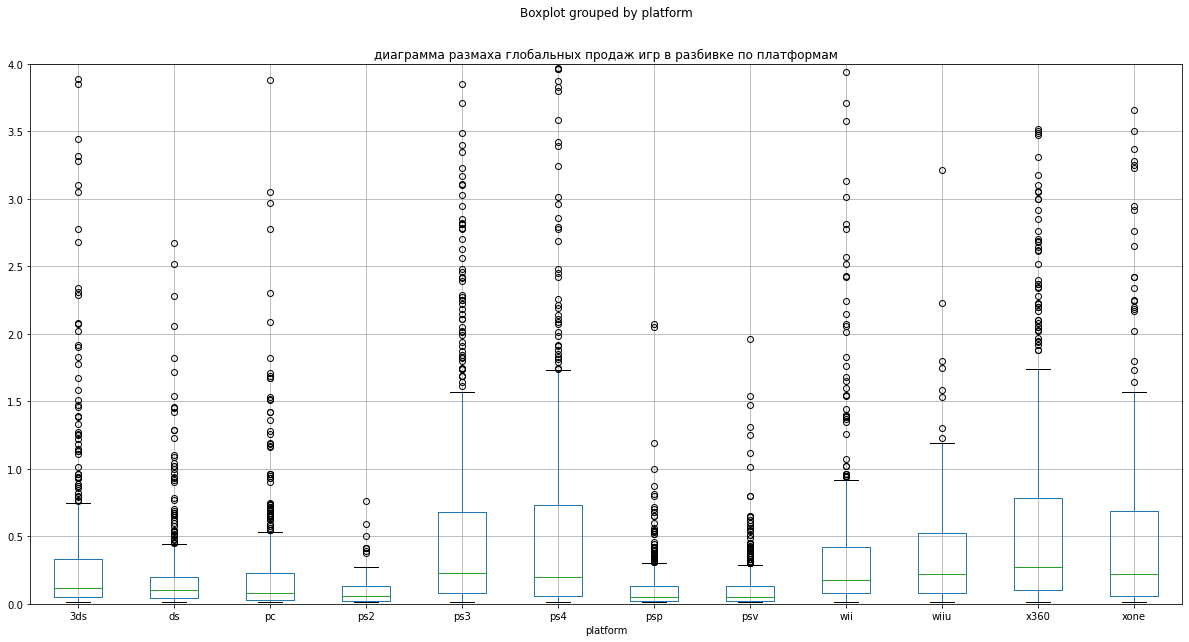

In [35]:
plot = df_actual[df_actual.platform.isin(platforms_actual)].boxplot('total_sales', by='platform', figsize = (20, 10))
plt.ylim(0, 4)
plt.title('диаграмма размаха глобальных продаж игр в разбивке по платформам')

Из 12 платформ, оставшихся в датафрейме после выделения актуального для нас врменного интервала, для 7 (3ds, ds, pc, ps2, psp, psv, wii) продажи более миллиона копий уже можно отнести к редким наблюдениям. 


4 платформы лидируют, так как для них "необычно большой уровень продаж" начинается от 1,5 млн копий.  Среди них есть и те платформы, которые мы определили как растущие (ps4 и xone)

<a id="step3F"></a>
#### как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

выясним зависимость продаж от отзывов пользователей и критиков для платформы ps4. сделаем срез по данной платформе

In [36]:
df_ps4 = df_actual.query('platform == "ps4"')

In [37]:
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             392 non-null    object        
 1   platform         392 non-null    object        
 2   year_of_release  392 non-null    datetime64[ns]
 3   genre            392 non-null    object        
 4   na_sales         392 non-null    float64       
 5   eu_sales         392 non-null    float64       
 6   jp_sales         392 non-null    float64       
 7   other_sales      392 non-null    float64       
 8   critic_score     252 non-null    float64       
 9   user_score       257 non-null    float64       
 10  rating           255 non-null    object        
 11  total_sales      392 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 39.8+ KB


<AxesSubplot:title={'center':'ps4: зависимость продаж от отзывов критиков'}, xlabel='total_sales', ylabel='critic_score'>

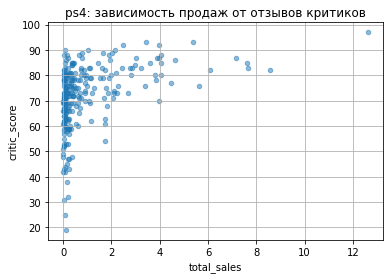

In [38]:
df_ps4.plot(x='total_sales', y='critic_score', kind= 'scatter', alpha=0.5, grid=True, title='ps4: зависимость продаж от отзывов критиков')

In [39]:
df_ps4['total_sales'].corr(df_ps4['critic_score'])

0.406567902061781

наблюдается умеренная положительная корреляция между продажами ирг на платформе ps4 и отзывами критиков 

<AxesSubplot:title={'center':'ps4: зависимость продаж от отзывов пользователей'}, xlabel='total_sales', ylabel='user_score'>

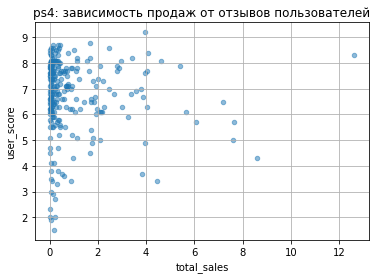

In [40]:
df_ps4.plot(x='total_sales', y='user_score', kind= 'scatter', alpha=0.5, grid=True, title='ps4: зависимость продаж от отзывов пользователей')

In [41]:
df_ps4['total_sales'].corr(df_ps4['user_score'])

-0.031957110204556424

связи между продажами игр на платформе ps4 и отзывами игроков нет

проделаем то же самое для платформы xone

In [42]:
df_xone = df_actual.query('platform == "xone"')

In [43]:
df_xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             247 non-null    object        
 1   platform         247 non-null    object        
 2   year_of_release  247 non-null    datetime64[ns]
 3   genre            247 non-null    object        
 4   na_sales         247 non-null    float64       
 5   eu_sales         247 non-null    float64       
 6   jp_sales         247 non-null    float64       
 7   other_sales      247 non-null    float64       
 8   critic_score     169 non-null    float64       
 9   user_score       182 non-null    float64       
 10  rating           186 non-null    object        
 11  total_sales      247 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 25.1+ KB


<AxesSubplot:title={'center':'xone: зависимость продаж от отзывов критиков'}, xlabel='total_sales', ylabel='critic_score'>

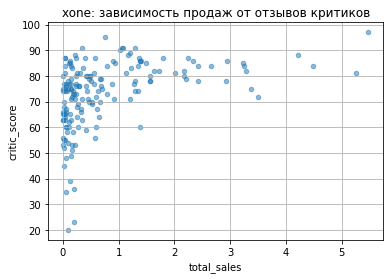

In [44]:
df_xone.plot(x='total_sales', y='critic_score', kind= 'scatter', alpha=0.5, grid=True, title='xone: зависимость продаж от отзывов критиков')

In [45]:
df_xone['total_sales'].corr(df_xone['critic_score'])

0.41699832800840175

наблюдается умеренная положительная корреляция между продажами игр на платформе xone и отзывами критиков

<AxesSubplot:title={'center':'xone: зависимость продаж от отзывов пользователей'}, xlabel='total_sales', ylabel='user_score'>

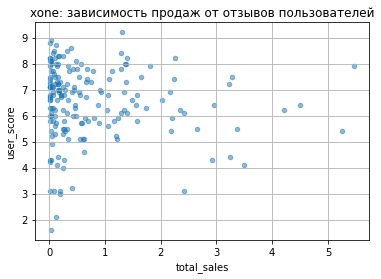

In [46]:
df_xone.plot(x='total_sales', y='user_score', kind= 'scatter', alpha=0.5, grid=True, title='xone: зависимость продаж от отзывов пользователей')

In [47]:
df_xone['total_sales'].corr(df_xone['user_score'])

-0.06892505328279412

связи между продажами игр на платформе xone и отзывами игроков нет

Заметим, что отзывы пользователей не оказывают влияния на успешность той или иной игры как на платформе ps4, так и на xone. Корреляция не отражает причинно-следственную связь, скорее говорит о том, что у пользователей различаются вкусы и предпочтения и они оценивают игру не по каким-то универсальным общим критериям. Отзывы критиков заметно сильнее связаны с объемом продаж игр, но и здесь наблюдается всего лишь умеренная корреляция. 


Нужно также отметить, что здесь мог сказаться недостаток данных (не для всех игр есть информация о отзывах пользователей и критиков)

<a id="step3G"></a>
#### Соотнесите выводы с продажами игр на других платформах

Можно ожидать, что и для других платформ такой показатель, как отзывы не будет сильно связан с итоговым объемом продаж той или иной игры

<a id="step3H"></a>
#### Посмотрите на общее распределение игр по жанрам

In [48]:
df_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc= ['sum']).sort_values(('sum','total_sales'), ascending = False)

,sum
,total_sales
genre,
action,673.09
shooter,479.74
sports,328.39
role-playing,315.28
misc,234.56
racing,122.68
platform,119.72
fighting,81.59


Топ-5 жанров по глобальным продажам выглядит следующим образом: игры в жанре "action" лидируют с большим отрывом (продано 673,09 млн копий), следом идут игры-шутеры (479,74 млн), почти одинаковую величину продаж имеют спротивные и ролевые игры (328.39 и 315.28 соответсвенно), замыкают топ-5 игры в жанре "misc" (234.56 млн копий)

### Вывод
Исследовательский анализ данных показал, что:

- количество игр нарастало до 2008 года, затем стабилизировалось на уровне около 1400 в год (2008-2009) и пошло на спад
- к платформам с наибольшими продажами за весь представленный период можно отнести 'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'. Суммарно именно на этих платформах вышло более половины игр
- "жизненный цикл" платформы составляет примерно 10 лет
- первые 2-3 года наблюдается бурный рост новой платформы, продажи достигают своих пиковых значений
- примерно через 6-7 лет платформа переходит в стадию упадка
- исходя из этого мы определили период 2010-2016 гг как актуальный для принятия решения 
- за выбранный актуальный период рост демонстрируют 2 игровые платформы - ps4 и xone.
- диаграммы размаха для платформ за актуальный период показали, что для большей части платформ (7 из 12) продажи более миллиона копий уже можно отнести к редким наблюдениям. 4 платформы лидируют, так как для них "необычно большой уровень продаж" начинается от 1,5 млн копий. Среди них есть и те платформы, которые мы определили как растущие (ps4 и xone)
- продажи игр для платформ ps4 и xone умеренно положительно связаны с отзывами критиков и не связаны с отзывами пользователей
- безусловным лидером среди игровых жанров по продажам является жанр action

<a id="step4"></a>
### Шаг 4. Составьте портрет пользователя каждого региона

<a id="step4A"></a>
#### Самые популярные платформы (топ-5)

Определим самые популярные платформы в разрезе регионов (NA - Северная Америка, EU - Европа, JP - Япония) за выбраныый актуальный период

*Северная Америка*

In [49]:
na_platforms = df_actual.groupby('platform')['na_sales'].agg('sum').sort_values(ascending = False)

In [50]:
na_platforms

platform
x360    334.18
ps3     229.25
wii     121.20
ps4     108.74
xone     93.12
3ds      82.65
ds       59.66
pc       39.07
wiiu     38.10
psv      12.47
psp       9.65
ps2       2.32
Name: na_sales, dtype: float64

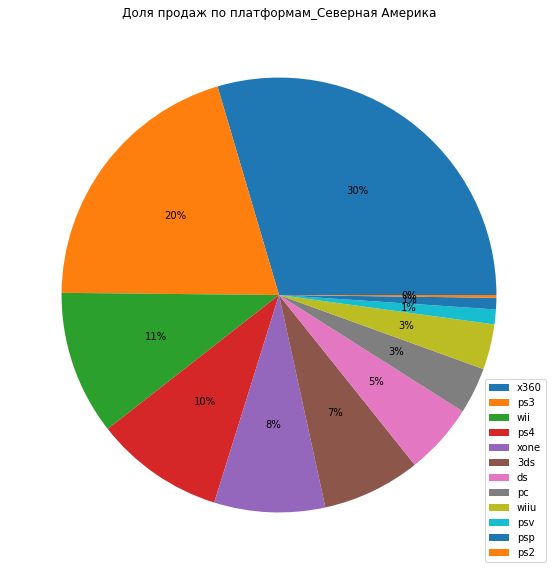

In [51]:
na_platforms.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по платформам_Северная Америка')
plt.show()

В топ-5 по популярности платформ в Северной Америке входят: x360 (334.18), ps3 (229.25), wii (121.20), ps4 (108.74), xone (93.12). Топ-5 платформ в сумме дают примерно 75% продаж, при этом две первые платформы в сумме занимают 50%

*Европа*

In [52]:
eu_platforms = df_actual.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending = False)

In [53]:
eu_platforms

platform
ps3     213.60
x360    163.41
ps4     141.09
pc       68.82
wii      65.91
3ds      61.27
xone     51.59
ds       28.06
wiiu     25.13
psv      13.07
psp       7.59
ps2       1.67
Name: eu_sales, dtype: float64

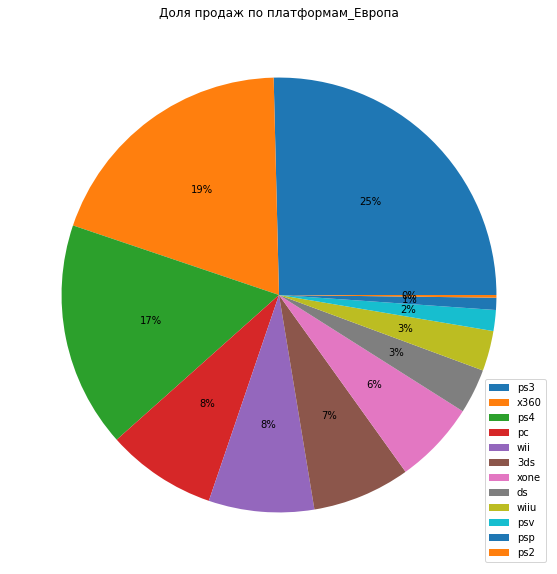

In [54]:
eu_platforms.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по платформам_Европа')
plt.show()

Лидирующие позиции в Европе занимают следующие платформы: ps3 (213.60), x360 (163.41), ps4 (141.09), pc (68.82), wii (65.91).  В сумме они также дают примерно 75% продаж. Потребители в вропе кажутся более консервативными, чем в Америке: в Европейский топ-5 еще не вошла новая платформа "xone" и из него еще не вышла старая платформа "pc"

*Япония*

In [55]:
jp_platforms = df_actual.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending = False)

In [56]:
jp_platforms

platform
3ds     100.62
ps3      59.26
psp      42.20
ds       27.90
psv      21.84
wii      17.75
ps4      15.96
wiiu     13.01
x360      5.46
ps2       0.80
xone      0.34
pc        0.00
Name: jp_sales, dtype: float64

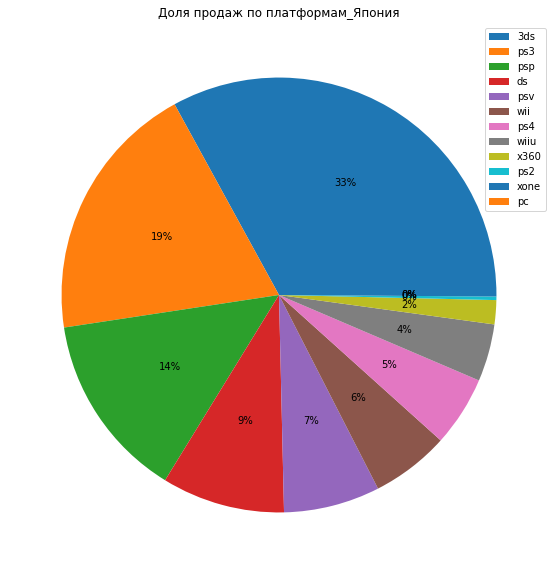

In [57]:
jp_platforms.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по платформам_Япония')
plt.show()

Япония, ожидаемо, не похожа на другие рынки. В топ-5 здесь входят 3ds (100.62), ps3 (59.26), psp (42.20), ds (27.90), psv (21.84). Только одна платформа из топ-5 (ps3) встречалась нам в лидерах продаж в Америке и Европе. Топ-5 японского рынка в сумме дают больше 75% продаж игр

<a id="step4B"></a>
#### Самые популярные жанры (топ-5)

Определим самые популярные платформы в разрезе жанров за выбранный актуальный период

*Северная Америка*

In [58]:
na_genres = df_actual.groupby('genre')['na_sales'].agg('sum').sort_values(ascending = False)

In [59]:
na_genres

genre
action          290.64
shooter         237.47
sports          156.81
misc            123.80
role-playing    112.05
platform         54.90
racing           46.11
fighting         39.05
simulation       26.39
adventure        20.84
strategy         13.25
puzzle            9.10
Name: na_sales, dtype: float64

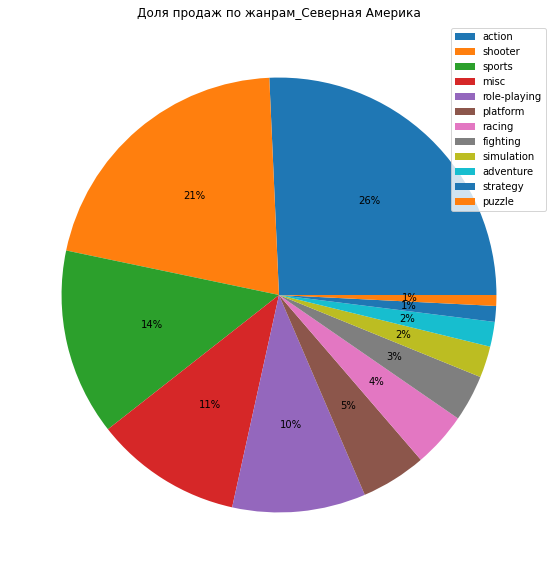

In [60]:
na_genres.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по жанрам_Северная Америка')
plt.show()

Топ-5 жанров на рынке Северной Аммерики очень четко видны. Это action (26%), shooter (21%), sports (14%), misc (11%) и role-playing (10%)

*Европа*

In [61]:
eu_genres = df_actual.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending = False)

In [62]:
eu_genres

genre
action          233.63
shooter         171.45
sports          116.84
role-playing     75.48
misc             66.09
racing           54.75
platform         38.30
simulation       26.39
fighting         20.33
adventure        18.88
strategy         12.49
puzzle            6.58
Name: eu_sales, dtype: float64

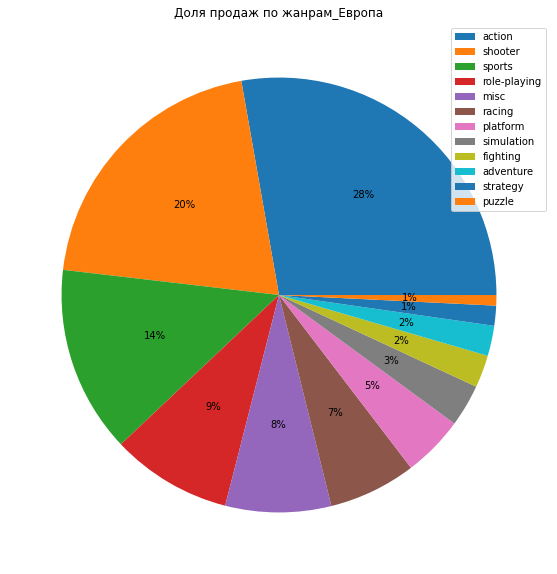

In [63]:
eu_genres.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по жанрам_Европа')
plt.show()

Мы видим, что лидеры на европейско мрынке те же, но немного отличается их последовательность: action (28%), shooter (20%), sports (14%), role-playing (9%) и misc (8%). В Европе по сравнению с Америкой чуть более популярны игры action и чуть менее популярны игры shooter

*Япония*

In [64]:
jp_genres = df_actual.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending = False)

In [65]:
jp_genres 

genre
role-playing    103.54
action           72.20
misc             24.29
platform         15.81
adventure        15.67
sports           15.51
shooter          14.04
fighting         13.90
simulation       13.30
strategy          6.80
racing            6.68
puzzle            3.40
Name: jp_sales, dtype: float64

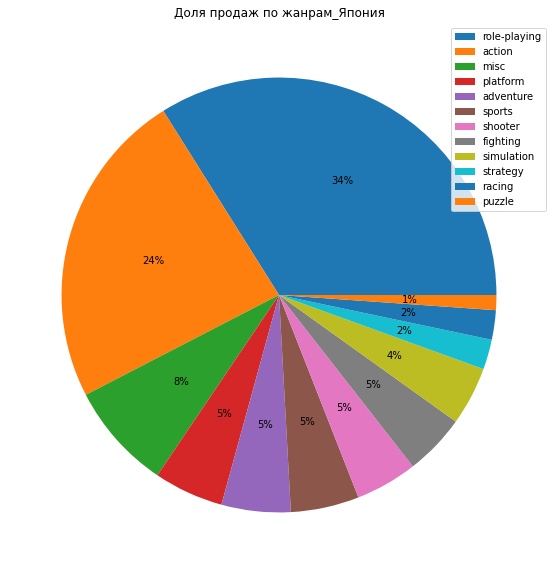

In [66]:
jp_genres.plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Доля продаж по жанрам_Япония')
plt.show()

И здесь Япония демонстрирует свою непохожесть на западные рынки. На этом рынке достаточно условно можно определить топ-5. Самый популярный на этом рынке жанр - role-playing (34%), который на других рынках занимал 4 и 5 места в рейтинге популярности. На втором месте action (24%). Также в лидеры рынка входят жанры misc (8%), platform (5%), adventure(5%). Два последних не встречались на верхних строчках западных рейтингов. Популярные у западных геймеров жанры sports и shooter по абсолютному значению продаж остались за пределами топ-5, пусть и с небольшой разницей. На круговой диаграмме мы можем видеть целых 5 секторов с одинаковой долей.   

<a id="step4C"></a>
#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [67]:
na_esrb = df_actual.groupby('rating')['na_sales'].agg('sum').sort_values(ascending = False)

In [68]:
na_esrb

rating
M       382.22
E       271.15
T       160.81
E10+    159.38
EC        1.13
RP        0.00
Name: na_sales, dtype: float64

In [69]:
eu_esrb = df_actual.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending = False)

In [70]:
eu_esrb

rating
M       292.04
E       197.34
T       113.08
E10+     99.28
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [71]:
jp_esrb = df_actual.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending = False)

In [72]:
jp_esrb 

rating
E       47.87
T       42.11
M       30.45
E10+    13.22
RP       0.00
EC       0.00
Name: jp_sales, dtype: float64

исследуя то, как продаются игры с разных рейтингом, опять можно увидеть, что рынки Европы и Америки схожи друг с другом, а рынок Японии имеет свои особенности. В Америке и Европе наибольшие продажи у игр с рейтингом М («Mature», «От 17 лет»), на втором месте находятся игры с рейтингом Е («Everyone», «Для всех старше 6 лет») и на третьем месте - игры для подростков с рейтингом Т («Teen», «Подросткам 13—19 лет»). В Японии же на первом месте универсальные игры для широкого возрастного диапазона, и по мере "взросления" рейтинга популярность игр снижается. 


Такой результат вполне ожидаем, если учесть разницу в предпочтениях по жанрам. Жанры, которые вероятнее дургих будут иметь возрастные ограничения (например, shooter), не входят в пятерку популярных в Японии. Напротив, популярный жанр role-playing вполне может рекомендоваться для игроков разных возрастов

### Вывод

Анализ особенностей региональных рынков показал, что:

- рынки Европы и Северной Америки довольно близки по предпочтения потребителей как с точки зрения платформ, так и с точки зрения игровых жанров. Европу можно назвать чуть более консервативной
- Япония демонстрирует отличия и по тем платформам, которые пользуются пополуярностью, и по игровым жанрам
- продажи в каждом из регионов в разрезе рейтингов ESRB согласуются с картиной продаж в разрезе жанров. По-видимому, рейтинг сам по себе не влиет на продажи 

<a id="step5"></a>
### Шаг 5. Проверьте гипотезы

<a id="step5A"></a>
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

сделаем срезы по соответсвующим платформам

In [73]:
xone = df_actual.query('platform == "xone"')

In [74]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             247 non-null    object        
 1   platform         247 non-null    object        
 2   year_of_release  247 non-null    datetime64[ns]
 3   genre            247 non-null    object        
 4   na_sales         247 non-null    float64       
 5   eu_sales         247 non-null    float64       
 6   jp_sales         247 non-null    float64       
 7   other_sales      247 non-null    float64       
 8   critic_score     169 non-null    float64       
 9   user_score       182 non-null    float64       
 10  rating           186 non-null    object        
 11  total_sales      247 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 25.1+ KB


Перед проведением теста нужно удалить пропущенные значения из столбца user_score

In [75]:
xone = xone.dropna(subset=['user_score'])

In [76]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             182 non-null    object        
 1   platform         182 non-null    object        
 2   year_of_release  182 non-null    datetime64[ns]
 3   genre            182 non-null    object        
 4   na_sales         182 non-null    float64       
 5   eu_sales         182 non-null    float64       
 6   jp_sales         182 non-null    float64       
 7   other_sales      182 non-null    float64       
 8   critic_score     165 non-null    float64       
 9   user_score       182 non-null    float64       
 10  rating           176 non-null    object        
 11  total_sales      182 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 18.5+ KB


In [77]:
xone.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,182.000000,182.000000,182.000000,182.000000,165.000000,182.000000,182.000000
mean,0.431923,0.238132,0.001593,0.066044,73.618182,6.521429,0.737692
std,0.620657,0.377369,0.005679,0.092520,12.883849,1.380941,1.018062
min,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,0.040000,0.020000,0.000000,0.010000,67.000000,5.800000,0.082500
50%,0.170000,0.090000,0.000000,0.030000,76.000000,6.800000,0.300000
75%,0.557500,0.275000,0.000000,0.090000,83.000000,7.500000,1.057500
max,3.220000,2.190000,0.040000,0.480000,97.000000,9.200000,5.470000


In [78]:
pc = df_actual.query('platform == "pc"')

In [79]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 192 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             479 non-null    object        
 1   platform         479 non-null    object        
 2   year_of_release  479 non-null    datetime64[ns]
 3   genre            479 non-null    object        
 4   na_sales         479 non-null    float64       
 5   eu_sales         479 non-null    float64       
 6   jp_sales         479 non-null    float64       
 7   other_sales      479 non-null    float64       
 8   critic_score     350 non-null    float64       
 9   user_score       374 non-null    float64       
 10  rating           357 non-null    object        
 11  total_sales      479 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 48.6+ KB


Перед проведением теста нужно удалить пропущенные значения из столбца user_score

In [80]:
pc = pc.dropna(subset=['user_score'])

In [81]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 192 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             374 non-null    object        
 1   platform         374 non-null    object        
 2   year_of_release  374 non-null    datetime64[ns]
 3   genre            374 non-null    object        
 4   na_sales         374 non-null    float64       
 5   eu_sales         374 non-null    float64       
 6   jp_sales         374 non-null    float64       
 7   other_sales      374 non-null    float64       
 8   critic_score     348 non-null    float64       
 9   user_score       374 non-null    float64       
 10  rating           341 non-null    object        
 11  total_sales      374 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 38.0+ KB


In [82]:
pc.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,374.000000,374.000000,374.0,374.000000,348.000000,374.000000,374.000000
mean,0.097059,0.166818,0.0,0.034893,74.537356,6.518182,0.298770
std,0.264923,0.284241,0.0,0.075282,11.099824,1.565390,0.582147
min,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,0.010000
25%,0.000000,0.030000,0.0,0.000000,68.000000,5.600000,0.040000
50%,0.010000,0.060000,0.0,0.010000,76.000000,6.800000,0.110000
75%,0.090000,0.167500,0.0,0.030000,83.000000,7.700000,0.280000
max,2.570000,2.160000,0.0,0.600000,96.000000,9.300000,5.140000


*ГИПОТЕЗЫ*


Формулируем гипотезу Н0 (так, чтобы использовать знак равенства): *средние пользовательские рейтинги платформ Xbox One и PC одинаковы*


Следовательно, альтернативная гипотеза Н1 формулируется так: *средние пользовательские рейтинги платформ Xbox One и PC  различаются*


Поскольку нам неважно в данном случае, как конкретно они различаются (что больше, а что меньше), то гипотеза является *двухсторонней*


Уровень значимости (вероятность ошибиться, отвергнув гипотезу Н0) установим на уровне 0,05

In [83]:
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)
results.pvalue

0.9801634129117883

значение p-value оказалось больше порогового значения уровня значимости, следовательно **у нас нет оснований отвергнуть** гипотезу о равенстве среднего пользовательского рейтинга для платформ Xbox One и PC

<a id="step5B"></a>
#### Средние пользовательские рейтинги жанров Action и Sports разные

сделаем срезы по небходимым жанрам

In [84]:
action = df_actual.query('genre == "action"')

In [85]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1495 non-null   object        
 1   platform         1495 non-null   object        
 2   year_of_release  1495 non-null   datetime64[ns]
 3   genre            1495 non-null   object        
 4   na_sales         1495 non-null   float64       
 5   eu_sales         1495 non-null   float64       
 6   jp_sales         1495 non-null   float64       
 7   other_sales      1495 non-null   float64       
 8   critic_score     712 non-null    float64       
 9   user_score       779 non-null    float64       
 10  rating           889 non-null    object        
 11  total_sales      1495 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 151.8+ KB


Перед проведением теста нужно удалить пропущенные значения из столбца user_score

In [86]:
action = action.dropna(subset=['user_score'])

In [87]:
action.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,779.000000,779.000000,779.000000,779.000000,675.000000,779.000000,779.000000
mean,0.312580,0.257112,0.043312,0.084326,69.637037,6.781900,0.697330
std,0.635648,0.591106,0.112537,0.217255,13.263483,1.360201,1.413782
min,0.000000,0.000000,0.000000,0.000000,24.000000,1.600000,0.010000
25%,0.040000,0.030000,0.000000,0.010000,61.000000,6.000000,0.120000
50%,0.120000,0.090000,0.000000,0.030000,72.000000,7.100000,0.280000
75%,0.330000,0.270000,0.030000,0.080000,79.000000,7.800000,0.740000
max,9.660000,9.090000,1.110000,3.960000,97.000000,9.100000,21.050000


In [88]:
sports = df_actual.query('genre == "sports"')

In [89]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 77 to 16688
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             575 non-null    object        
 1   platform         575 non-null    object        
 2   year_of_release  575 non-null    datetime64[ns]
 3   genre            575 non-null    object        
 4   na_sales         575 non-null    float64       
 5   eu_sales         575 non-null    float64       
 6   jp_sales         575 non-null    float64       
 7   other_sales      575 non-null    float64       
 8   critic_score     264 non-null    float64       
 9   user_score       315 non-null    float64       
 10  rating           424 non-null    object        
 11  total_sales      575 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 58.4+ KB


Перед проведением теста нужно удалить пропущенные значения из столбца user_score

In [90]:
sports = sports.dropna(subset=['user_score'])

In [91]:
action.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,779.000000,779.000000,779.000000,779.000000,675.000000,779.000000,779.000000
mean,0.312580,0.257112,0.043312,0.084326,69.637037,6.781900,0.697330
std,0.635648,0.591106,0.112537,0.217255,13.263483,1.360201,1.413782
min,0.000000,0.000000,0.000000,0.000000,24.000000,1.600000,0.010000
25%,0.040000,0.030000,0.000000,0.010000,61.000000,6.000000,0.120000
50%,0.120000,0.090000,0.000000,0.030000,72.000000,7.100000,0.280000
75%,0.330000,0.270000,0.030000,0.080000,79.000000,7.800000,0.740000
max,9.660000,9.090000,1.110000,3.960000,97.000000,9.100000,21.050000


ГИПОТЕЗЫ

Формулируем гипотезу Н0 (так, чтобы использовать знак равенства): *средние пользовательские рейтинги жанров Action и Sports одинаковы*

Следовательно, альтернативная гипотеза Н1 формулируется так: *средние пользовательские рейтинги жанров Action и Sports различаются*

Поскольку нам неважно в данном случае, как конкретно они различаются (что больше, а что меньше), то гипотеза является *двухсторонней*

Уровень значимости (вероятность ошибиться, отвергнув гипотезу Н0) установим на уровне 0,05

In [92]:
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
results.pvalue

1.4516152467844418e-15

значение p-value оказалось меньше порогового значения уровня значимости, следовательно **у нас есть основания отвергнуть** гипотезу о равенстве среднего пользовательского рейтинга для жанров Action и Sports

### Вывод

На основании t-теста на уровне значимости 5% можем утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
На основании t-теста на уровне значимости 5% мы не имеем повода утверждать, что средние пользовательские рейтинги жанров Action и Sports одинаковы.

<a id="step6"></a>
### Шаг 6. Напишите общий вывод

На основе проведенного исследования мы можем рекомендовать нтернет-магазину «Стримчик» при планировании деятельности на 2017 год принимать во внимание следующие факторы:

1. стадию жизненного цикла платформы. вероятно, не стоит рассчитывать на высокий уровень продаж на платформах, находящихся на рынке более 6-7 лет
2. среди новых платформ потенциально растущими являются Xbox One и PS4
3. для этих платформ не является редкостью продажа более 1,5 млн копий игр
4. продажи игр не связаны с оценкой этих игр пользователями
5. продажи игр умеренно положительно связаны с оценкой этих игр критиками
6. лидером по глобальным продажам является жанр action
7. японский рынок очень отличается по предпочтениям от европейского и американского
8. средние пользовательские рейтинги платформ Xbox One и PC одинаковы
9. средние пользовательские рейтинги жанров Action и Sports не одинаковы